In [1]:
#This notebook performs Exploratory Data Analysis on Diabetes in population data
#This notebook also applies a Linear Regression model to predict future population with diabetes percentages
import pandas as pd
diabetes_pd = pd.read_csv('/Users/cesarromo/Desktop/diabeteas_new.csv')

In [2]:
diabetes_pd

,Year,Total - Percentage,Total - Lower Limit,Total - Upper Limit
0,1994,4.2,3.6,5.0
1,1995,6.1,4.8,7.8
2,1996,5.4,4.6,6.3
3,1997,5.9,5.1,6.9
4,1998,5.8,5.0,6.7
5,1999,6.5,5.6,7.4
6,2000,7.1,6.0,8.4
7,2001,6.6,5.8,7.6
8,2002,8.0,6.9,9.1
9,2003,7.5,6.6,8.5


In [3]:
diabetes_pd.columns

Index(['Year', 'Total - Percentage', 'Total - Lower Limit',
       'Total - Upper Limit'],
      dtype='object')

In [4]:
#Rename the last 3 columns to shorter names and no whitesapces
diabetes_pd = diabetes_pd.rename(columns = {'Total - Percentage': 'TotPer', 'Total - Lower Limit': 'TotLowerLimit',
       'Total - Upper Limit': 'TotUpperLimit'})

In [5]:
diabetes_pd.columns

Index(['Year', 'TotPer', 'TotLowerLimit', 'TotUpperLimit'], dtype='object')

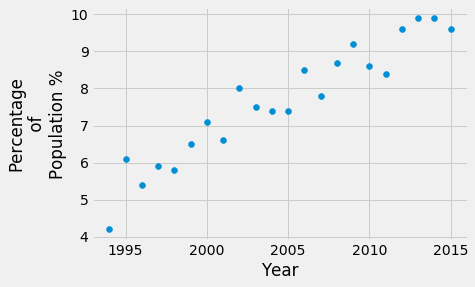

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')
plt.scatter(diabetes_pd['Year'], diabetes_pd['TotPer'])
plt.xlabel('Year')
plt.ylabel('Percentage\n of \nPopulation %')
plt.show()


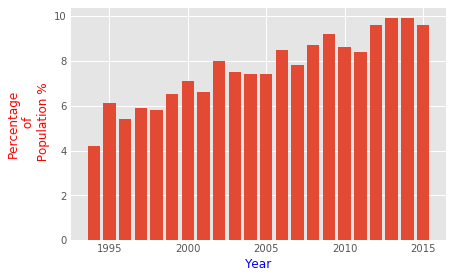

In [7]:
plt.style.use('ggplot')
plt.bar(diabetes_pd['Year'], diabetes_pd['TotPer'])
plt.xlabel('Year', color = 'b')
plt.ylabel('Percentage\n of\n Population %', color = 'r')
plt.show()


In [8]:
#To create a prediction model
from scipy import stats

est_linear = stats.linregress(diabetes_pd['Year'], diabetes_pd['TotPer'])
est_linear

LinregressResult(slope=0.23156408808582726, intercept=-456.52930547713169, rvalue=0.95289041192175139, pvalue=7.9955376798058482e-12, stderr=0.016481883619429993)

In [11]:
#Predict a percentage y in a year x = 2020
x = 2020
y = est_linear.slope * x + est_linear.intercept

print('The Percentage of population with diabetes in 2020 will be: {}'.format(y))

The Percentage of population with diabetes in 2020 will be: 11.23015245623941


In [13]:
#Predict in which year will the percentage of the population with diabetes will be 20%
y = 20
x = (y - est_linear.intercept)/est_linear.slope
print('The Percentage of population with diabetes will be 20% in the year: {}'.format(int(round(x))))

The Percentage of population with diabetes will be 20% in the year: 2058


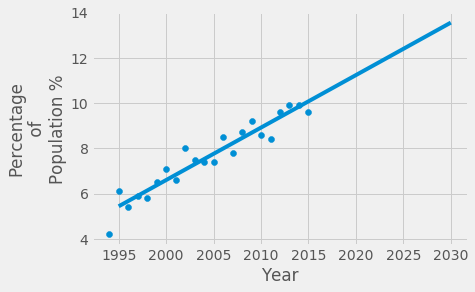

In [10]:
import numpy as np

x_arr = np.linspace(1995, 2030, 100)
y_arr = est_linear.slope * x_arr + est_linear.intercept

import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')
plt.scatter(diabetes_pd['Year'], diabetes_pd['TotPer'])
plt.xlabel('Year')
plt.ylabel('Percentage\n of \nPopulation %')


plt.style.use('fivethirtyeight')
plt.plot(x_arr, y_arr)
plt.xlabel('Year')
plt.ylabel('Percentage\n of \nPopulation %')
plt.show()